# Choose Your Dogstiny

### Using NLP to identify features for your new best friend

How many times have you been online trying to find the perfect house, your next car, what restaurant to go to, etc.?  We are used to visiting websites that help us find these items by typing in specific criteria and then generating a list of results based on this.  What happens if we could utilize this same idea to help people find a furry best friend?

A lot of the pet finder websites rely on someone to select a breed and then generating a compilation of characteristics that pertain to that breed.  This process has flaws as it can become very time intensive and it may not give you the ability to accurately compare between different breeds.  For my project, I want to reverse that look up.  What if you can actually look for the features that work best for your lifestlye?  If you live an apartment, you wouldn't want a very large dog, nor would you want a dog known for it's "singing abilities".

To compile and present the data that will allow me to do this, I have chosen to grab my data via web from the website:  dogbreedinfo.com

This website provides comprehensive descriptions of over 1000s of dog breeds.  As this provides a large quantity of information, I will be working through web scraping and data clean up processes in order to convert the information into a dataframe that is relevant and allows us to achieve our goal.

My notebook will guide you through web scraping, data cleaning, feature generation, clustering, comparisons, and final summary.  Techniques such as BeautifulSoup will work nicely because it will be helpful with web scraping.  As we are working through a large number of text, Tfidf Vectorizers will also be used.  

In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scrapy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import matplotlib.patches as mpatches
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn import metrics

### Web Scraping

First things first, we need to get our data from the website before we can work through our steps.  Web scraping is an important process as it provides assistance to aid in extracting any kind of data you want.  The process works to automate the extraction of data in an efficient way.  Web scraping will let you retrieve, analyze, and use the data in the way you want.  It takes all the data on a webpage and based on the information you provide, it turns that information into structured data that you can save as CSV format.  This is important as you can then use the CSV and work through further analysis.

It is very important to note that you don't want to go through web scraping processes on a website multiple times.  Websites might start to notice the amount of times your IP address is pinging their website for the information and assume that you are a bot.  Their is a real possibility of the website blocking your IP address.  Because of this, it is best practice to do all your scraping at once and then save as a CSV.

That is exactly what I did for my project.  I extracted the data from the website using the following code:

In [2]:
#all_dog_breeds = []
#for breed in breed_name[19:1000]:
    #start_urls = 'https://www.dogbreedinfo.com/'+breed
    #page= requests.get(start_urls)
    #soup = BeautifulSoup(page.content, 'html.parser')
    #single_dog = []
    #for x in soup.find_all('p'):
        #single_dog.append(x.getText())
    #all_dog_breeds.append(single_dog)

This was then saved as the dog_breed.csv that is the start point of my project.  I am now ready to run through my analysis and can read the dataframe in from the created csv file without having to go through the web scraping process again.

In [3]:
dogs = pd.read_csv('dog_breed.csv')
dogs.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,54,55,56
0,0,Menu,Assisting rescues and pet owners in dog breed ...,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Menu,What kind of dog is right for you?,© Dog Breed Info Center® All Rights Reserved,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Menu,The Indian Hare Dog,"Thylacine, The Australian Tiger Dog",Cordoba Fighting Dog,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Menu,Full List of Mix Breed Dogs,Full List of Purebred Dogs Mixed With...,ACHC Recognized Hybrid Dogs,DDKC Recognized Hybrid Dogs,IDCR Recognized Hybrid Dogs,DBR Recognized Mixed Breed Dogs,Chihuahua Mixed Breed Dogs,Cocker Spaniel Mixed Breed Dogs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Menu,To see a list excluding mix breed dogs visit P...,Want More Search Options?,New breeds and mixes are being added on a regu...,The Material contained herein may not be repr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

Our data has now been read into the workbook.  It is time to clean our data.  As you can probably guess, this is a very large data set and one filled with a lot of information that are not relevant to the purpose of the project.  BeautifulSoup will allow us to return text string that is stripped of any HTML tags and metadata.

In [4]:
name_urls = 'https://www.dogbreedinfo.com/purebred.htm'
import requests 
page1= requests.get(name_urls)

from bs4 import BeautifulSoup 
soup1 = BeautifulSoup(page1.content, 'html.parser')

In [5]:
print(soup1.prettify())

<!DOCTYPE doctype html>
<!--[if lt IE 7]> <html class="ie6 oldie"> <![endif]-->
<!--[if IE 7]>    <html class="ie7 oldie"> <![endif]-->
<!--[if IE 8]>    <html class="ie8 oldie"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="" lang="en-US">
 <!-- InstanceBegin template="/Templates/Mains.dwt" codeOutsideHTMLIsLocked="false" -->
 <!--<![endif]-->
 <head>
  <!--
  ~ Copyright (C) 2014-2015 Media.net Advertising FZ-LLC All Rights Reserved
  -->
  <script type="text/javascript">
   window._mNHandle = window._mNHandle || {};
   window._mNHandle.queue = window._mNHandle.queue || [];
   medianet_versionId = "3121199";
  </script>
  <script async="async" src="//contextual.media.net/dmedianet.js?cid=8CU7I72PJ">
  </script>
  <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
  </script>
  <script>
   (adsbygoogle = window.adsbygoogle || []).push({ google_ad_client: "ca-pub-5852786167000487", enable_page_level_ads: true });
  </script>
  <!-- Global site tag (gtag

The data has now been stripped of the HTML tags and metadata, let's create a list that will allow us to find the names of the dogs.  Using the soup1 that we created from BeautifulSoup, we will grab all instances where the word in the data is preceeded by an 'a'.

In [6]:
format_name = []

In [7]:
for a in soup1.find_all('a', href=True): 
    format_name.append(a.text)

In [8]:
format_name

['Home',
 'All Breeds',
 'Purebreds',
 'Mix Breed Dogs',
 "Research your dog's mix",
 'Understanding Dog Behavior',
 'Housebreaking',
 'Raising a Puppy',
 'Search Categories',
 'Dog Quizzes',
 'Dogs Caught!',
 'Other Pets',
 'All Creatures',
 'Care Training+',
 'Whelping Puppies',
 'More Pictures',
 'Submit your Picture',
 'Spike the Bulldog',
 'Scam Warning',
 'Menu',
 'Want More Search Options?',
 'extinct breeds',
 'Hybrid Dogs',
 'All Purebred and Cross Breeds',
 'Search Category',
 'Search by Category',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P-Q',
 'R',
 'S',
 'T',
 'U-V',
 'W',
 'X-Y-Z',
 'Abruzzenhund',
 'Affenpinscher',
 'Afghan Hound',
 'Africanis',
 'Aidi',
 'Ainu Dog',
 'Airedale Terrier',
 'Akbash Dog',
 'Akitas',
 'Akita (American)',
 'Akita Inu (Japanese)',
 'Alano Español',
 'Alapaha Blue Blood Bulldog',
 'Alaskan Husky',
 'Alaskan Klee Kai',
 'Alaskan Malamute',
 'Alopekis',
 'Alpine Dachsbracke',
 'American Allaunt',

In [9]:
dogs.shape

(981, 58)

In [10]:
len(format_name)

1126

The names of the dogs have now been identified.  We need to make sure this information gets added back into our dataframe that we are working with.

In [11]:
dogs['Dog_Name'] = format_name[19:1000]

Further work needs to be done as not all the dogs names that were created are actually names.  There are lots of instances of a dog name coming up as 'A', 'B', etc.  Using the code below, we can only bring in dog names that are greater than 3.

In [12]:
dogs = dogs[dogs['Dog_Name'].str.len()>3]

In [13]:
print(dogs.index[[0,1,2,3,4,5,6,7,8]])

Int64Index([0, 1, 2, 3, 4, 5, 6, 28, 29], dtype='int64')


In [14]:
dogs_update = dogs.drop(index=dogs.index[[0,1,2,3,4,5,6,7,8]])

It is important to reset your index anytime you change it from the original.  We are removing rows that are not needed.  If this is not done, then your code will have the very real risk of not bringing in all the information.

In [15]:
dogs_update.reset_index(inplace=True)

In [16]:
dogs_update.columns

Index(['index', 'Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       'Dog_Name'],
      dtype='object')

In [17]:
dogs_update.shape

(572, 60)

We are getting so close!  The dataframe has the new column of Dog_Name created, but we have a lot of information that exists in different columns of the csv file.  The information is not all under the same column header.  As I will be working through the Vectorizer processes, I need to get my information together for each breed.  To solve for this, I will start by combining the information from the columns I want via concatenation.  This new field will then be linked to a corpus.  The corpus will then be the main repository for my keywords that will allow me to work through my clustering.

In [18]:
dogs_update['combined'] = dogs_update['2']+" "+dogs_update['3']+" "+dogs_update['4']+" "+dogs_update['5']+" "+dogs_update['6']+" "+dogs_update['7']+" "+dogs_update['8']+" "+dogs_update['9']+" "+dogs_update['10']+" "+dogs_update['11']+" "+dogs_update['12']+" "+dogs_update['13']+" "+dogs_update['14']+" "+dogs_update['15']

In [19]:
corpus = dogs_update['combined'].fillna("")

In [20]:
dogs_update.combined.iloc[550]

'The Spanish Water Dog is rustic and well-proportioned of medium weight. The head is strong and carried with elegance. The skull is flat with only a slightly marked occipital crest. Axes of skull and muzzle are parallel. The nostrils are well defined. The nose is of the same color or slightly darker than the darkest one of the coat. The lips are well fitting; labial corners are well defined. The teeth are well-formed, white, with well-developed canines. The eyes are at a slightly oblique position, very expressive; of a hazel to chestnut color, should harmonize with the color of the coat. The conjunctiva is not apparent. The neck is short, well-muscled, without dewlap and well set into the shoulders. The body is robust and the topline straight. The withers are hardly marked and the back is straight and powerful. The croup is slightly sloping. The chest is broad and well-let down; ribs are well arched; diameter of thorax is ample, indicating considerable respiratory capacity. The belly i

You can see from the example above that there is a lot of information that we will run into as we go through each dog breed.  All of the text that we run into is not something that we would need in order to extract the keywords for my project.  In order to remove words we do not need, let's create some stop lists.  

In [21]:
english_stop_list = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

Each dog breed contains a large number of keywords.  While you do want to get those words and put them in a separate stop list, having a block of code that shows all the keywords that are part of a stoplist is not visually appealing and also makes your workbook run slowly.  

I have decided to use the to_pickle() function.  This allows me to create a stop list file and then save it to a file path that will allow me to load it into my workbook - as opposed to having to run it every single time.

In [22]:
with open('listfile.data', 'rb') as filehandle:
    dog_stop_list = pickle.load(filehandle)

In [23]:
master_stop_list = english_stop_list+dog_stop_list
master_stop_list

['ourselves',
 'hers',
 'between',
 'yourself',
 'but',
 'again',
 'there',
 'about',
 'once',
 'during',
 'out',
 'very',
 'having',
 'with',
 'they',
 'own',
 'an',
 'be',
 'some',
 'for',
 'do',
 'its',
 'yours',
 'such',
 'into',
 'of',
 'most',
 'itself',
 'other',
 'off',
 'is',
 's',
 'am',
 'or',
 'who',
 'as',
 'from',
 'him',
 'each',
 'the',
 'themselves',
 'until',
 'below',
 'are',
 'we',
 'these',
 'your',
 'his',
 'through',
 'don',
 'nor',
 'me',
 'were',
 'her',
 'more',
 'himself',
 'this',
 'down',
 'should',
 'our',
 'their',
 'while',
 'above',
 'both',
 'up',
 'to',
 'ours',
 'had',
 'she',
 'all',
 'no',
 'when',
 'at',
 'any',
 'before',
 'them',
 'same',
 'and',
 'been',
 'have',
 'in',
 'will',
 'on',
 'does',
 'yourselves',
 'then',
 'that',
 'because',
 'what',
 'over',
 'why',
 'so',
 'can',
 'did',
 'not',
 'now',
 'under',
 'he',
 'you',
 'herself',
 'has',
 'just',
 'where',
 'too',
 'only',
 'myself',
 'which',
 'those',
 'i',
 'after',
 'few',
 'whom',

Who is ready for some clustering?

### K Means

This method is a way to group data into clusters of similar data points with similar variances. K Means assumes that the underlying "true" clusters are radially symmetrical. This means that they are uniform in all directions and the edges curve outward. K Means also assumes that all clusters have similar variances. This form of clustering can run more slowly as high-dimensional data tends to bog it down. In this instance, you can use mini-batch to speed it up. In the following clusters, you will see K Means and Mini-Batch clustering used

Since we are starting with K Means, let's define the features and the outcome.

I am going to begin with single keywords.  This allows me to look at the features as an individual word and also see how they are used among multiple dog breeds.  An important thing to note when you are suing the Tfifd Vectorizer is that it cannot be used on bigrams.

In [24]:
vectorizer = TfidfVectorizer(max_df=0.95,min_df=2, stop_words = master_stop_list)
tfidf = vectorizer.fit_transform(corpus)

In [25]:
print(vectorizer.get_feature_names())

['abilities', 'adapt', 'adaptability', 'adaptable', 'adaptive', 'adapts', 'adjust', 'adjusted', 'affection', 'affectionately', 'aggression', 'aggressive', 'aggressiveness', 'agile', 'agilely', 'agility', 'agreeable', 'alert', 'allergenic', 'allergic', 'allergies', 'allergy', 'alone', 'aloof', 'aloofness', 'amusing', 'animal', 'animals', 'anxiety', 'anxious', 'assert', 'assertive', 'athleticism', 'attached', 'attack', 'attacked', 'attacks', 'attention', 'attentive', 'babies', 'backyard', 'bark', 'barker', 'barking', 'barks', 'behaved', 'biting', 'calm', 'calmly', 'cat', 'cats', 'centered', 'charming', 'cheerful', 'chewing', 'child', 'companions', 'companionship', 'confident', 'confrontational', 'constant', 'courageous', 'danger', 'dangerous', 'dedicated', 'dedication', 'defend', 'defender', 'defends', 'defense', 'defensive', 'demanding', 'dependable', 'dependent', 'destroy', 'destroyed', 'destructive', 'destructiveness', 'determined', 'devoted', 'difficult', 'distant', 'docile', 'easygo

In [26]:
print(tfidf.todense())

[[0.         0.         0.         ... 0.         0.         0.15430554]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.26007715]
 ...
 [0.         0.         0.         ... 0.         0.         0.12847924]
 [0.         0.         0.         ... 0.         0.         0.30165085]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In the code below, we will reduce the components to 2 using PCA. We will also normalize the data. Then we will calculate the predicted values and plot the solution.

In [27]:
dogs_draft = tfidf.todense()

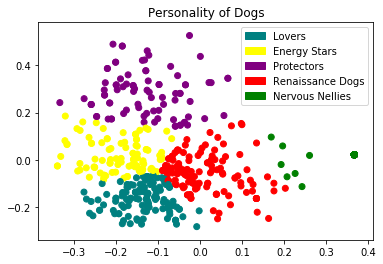

In [29]:
dog_model = normalize(dogs_draft)

dog_pca = PCA(2).fit_transform(dog_model)
dog_pred = KMeans(n_clusters=5,random_state=42).fit_predict(dog_pca)

colormap = np.array(['teal', 'yellow','purple','red','green'])
plt.scatter(dog_pca[:, 0], dog_pca[:, 1],c=colormap[dog_pred])

pop_a = mpatches.Patch(color='teal', label='Lovers')
pop_b = mpatches.Patch(color='yellow', label='Energy Stars')
pop_c = mpatches.Patch(color='purple', label='Protectors')
pop_d = mpatches.Patch(color='red', label='Renaissance Dogs')
pop_e = mpatches.Patch(color='green', label='Nervous Nellies')

plt.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e])

plt.title('Personality of Dogs')
plt.savefig("single_feature_kmeans.png")
plt.show()

Pretty nice clustering.  There are 5 distinct clusters that have some close proximity to each other.  There is one cluster that seems to be a bit more scattered than the others.  Please note that we are looking at multiple features among multiple dogs.  There are features that only seem to come up in a small number of dog breeds as opposed to being present in most breeds.

You might be asking why I selected the number 5 as my n_clusters.  I ran through the silhouette score process and determined that even when I increased the number of my clusters, the numbers I saw in 5 clusters seem to be the most appropriate number.  In the first 2 clusters, the numbers are high, but then it goes down and even with the increase of the cluster numbers, it tended to hover around the same amount.  

As I am also determining dog personality, it does not make sense to have a large number of clusters.  The point of the analysis is kind of lost when you introduce so many different options.

In [30]:
single_features = pd.DataFrame(dogs_draft,columns=vectorizer.get_feature_names())
single_features['K Means Clusters'] = dog_pred

In [31]:
single_features['K Means Clusters'].unique()

array([1, 4, 3, 2, 0])

In [32]:
single_features['Dog_Name']=dogs_update['Dog_Name']

In [33]:
single_features['Dog_Name'].unique()

array(['Affenpinscher', 'Afghan Hound', 'Africanis', 'Aidi', 'Ainu Dog',
       'Airedale Terrier', 'Akbash Dog', 'Akitas', 'Akita (American)',
       'Akita Inu (Japanese)', 'Alano Español',
       'Alapaha Blue Blood Bulldog', 'Alaskan Husky', 'Alaskan Klee Kai',
       'Alaskan Malamute', 'Alopekis', 'Alpine Dachsbracke',
       'American Allaunt', 'American Alsatian',
       'American Black and Tan Coonhound', 'American Blue Gascon Hound',
       'American Blue Lacy', 'American Bull Molosser', 'American Bulldog',
       'American Bullnese', 'American Bully', 'American Cocker Spaniel',
       'American English Coonhound', 'American Eskimo Dog',
       'American Foxhound', 'American Hairless Terrier',
       'American Indian Dog', 'American Lo-Sze Pugg ™',
       'American Mastiff', 'American Mastiff (Panja)',
       'American Pit Bull Terrier', 'American Staffordshire Terrier',
       'American Staghound', 'American Toy Terrier',
       'American Water Spaniel', 'American White Shep

We have 5 clusters.  What features build up the high numbers in each cluster?  We can see that information below.  I have sorted for cluster 2 to show me ascending values.  We see that exercise, leader, human, and walk are the high values for this cluster.  The personality type of dogs in this cluster could be classified as our 'Energy Stars'.  These are our active dogs that need a lot of stimulation and exercise.

In [34]:
single_features.groupby('K Means Clusters').mean().transpose().sort_values(2,ascending=False)

K Means Clusters,0,1,2,3,4
guard,0.007929,0.073022,0.260852,0.027830,0.000000
humans,0.093277,0.159255,0.192059,0.050771,0.000143
family,0.066435,0.161372,0.172044,0.078295,0.002081
leader,0.173940,0.184920,0.156750,0.066100,0.000122
guardian,0.003636,0.017930,0.127214,0.007532,0.000000
exercise,0.177626,0.137173,0.085592,0.126983,0.000000
people,0.077596,0.106445,0.083889,0.074710,0.002256
walk,0.147058,0.132471,0.080455,0.098529,0.005607
loyal,0.029806,0.083191,0.079819,0.036244,0.000177
protect,0.011176,0.020629,0.078045,0.017596,0.000000


In [35]:
single_features[single_features['Dog_Name']=='Chihuahua'].transpose()

,163
abilities,0
adapt,0
adaptability,0
adaptable,0
adaptive,0
adapts,0
adjust,0
adjusted,0
affection,0.161339
affectionately,0


There a lot of features in each cluster.  I want to whittle down the amount of features and look at my clusters based on a certain set of features.  I have taken the higher ranked features from each cluster and created a view of them below.  These are also the features I will use to show my heatmap visual.

In [36]:
single_heatmap = single_features.groupby('K Means Clusters').mean().transpose().loc[['leader','family','exercise','yard','guard','guardian','calm','aloof','anxious','family','reserved','walk','people','chewing']]
single_heatmap

K Means Clusters,0,1,2,3,4
leader,0.173940,0.184920,0.156750,0.066100,0.000122
family,0.066435,0.161372,0.172044,0.078295,0.002081
exercise,0.177626,0.137173,0.085592,0.126983,0.000000
yard,0.104290,0.079123,0.061747,0.095036,0.002312
guard,0.007929,0.073022,0.260852,0.027830,0.000000
guardian,0.003636,0.017930,0.127214,0.007532,0.000000
calm,0.061961,0.076407,0.076170,0.054515,0.001591
aloof,0.000000,0.014491,0.022096,0.023121,0.003866
anxious,0.002261,0.000000,0.000000,0.006146,0.000000
family,0.066435,0.161372,0.172044,0.078295,0.002081


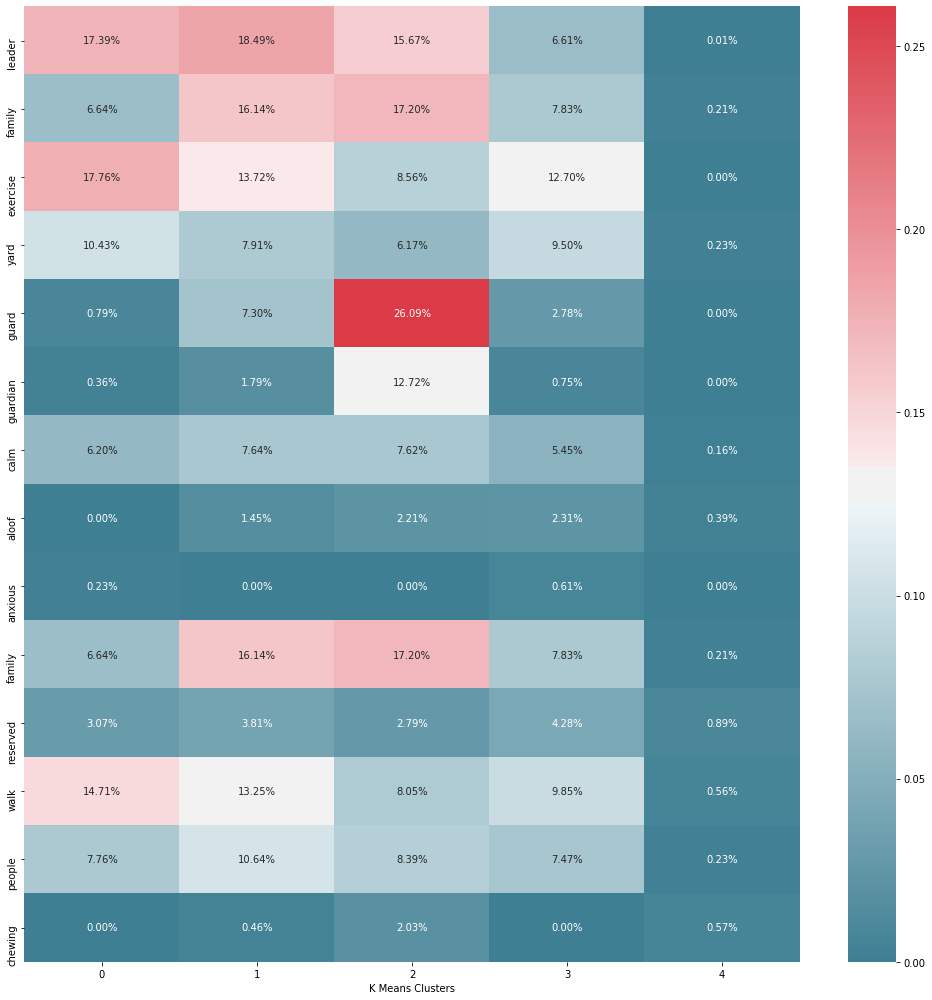

In [37]:
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(single_heatmap, annot = True, cmap = colormap, fmt='.2%')
plt.tight_layout()
plt.savefig("single_feature_kmeans_heatmap.png")

### Mini Batch

Mini Batch is another component of K Means.  We can utilize this if we don't want to reduce our dimensions, but do have liminted computational power, or if you need it run quicker.  This method randomly samples subsets of the training data in each iteration. 

The loop steps are similair to K Means, but the solution that you get will typically be a little worse than the regular k means, but it will fun faster. 

In [38]:
dog_pca.shape

(572, 2)

In [39]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=952)
minibatchkmeans.fit(dog_pca)

predict_mini = minibatchkmeans.predict(dog_pca)

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, dog_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0   1   2    3    4
row_0                       
0       17   8   0  123    0
1        0   0   0    1  129
2        0  42  34    6    0
3        0   0  51    0    0
4      111  50   0    0    0


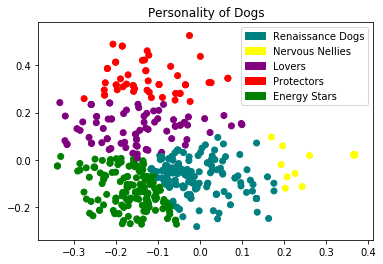

In [45]:
colormap = np.array(['teal', 'yellow','purple','red','green'])
plt.scatter(dog_pca[:, 0], dog_pca[:, 1], c=colormap[predict_mini])

pop_a1 = mpatches.Patch(color='teal', label='Renaissance Dogs')
pop_b1 = mpatches.Patch(color='yellow', label='Nervous Nellies')
pop_c1 = mpatches.Patch(color='purple', label='Lovers')
pop_d1 = mpatches.Patch(color='red', label='Protectors')
pop_e1 = mpatches.Patch(color='green', label='Energy Stars')

plt.legend(handles=[pop_a1,pop_b1,pop_c1,pop_d1,pop_e1])

plt.title('Personality of Dogs')
plt.savefig("single_feature_minibatch.png")
plt.show()

Now, the graph above is showing some interesting data.  A lot of my rows are showing 0, which is indicative that some separation is happening.

In [40]:
mini_single_features = pd.DataFrame(dogs_draft,columns=vectorizer.get_feature_names())
mini_single_features['Mini Batch Clusters'] = predict_mini

In [41]:
mini_single_features.groupby('Mini Batch Clusters').mean().transpose().sort_values(4,ascending=False)

Mini Batch Clusters,0,1,2,3,4
leader,0.073597,0.000121,0.175154,0.147481,0.185691
exercise,0.136390,0.000987,0.118533,0.077304,0.163107
human,0.054938,0.000141,0.084899,0.048343,0.162486
walk,0.102611,0.005564,0.113888,0.073702,0.145553
humans,0.054991,0.000142,0.168833,0.205548,0.113815
lead,0.039290,0.001297,0.050017,0.040580,0.102946
yard,0.097714,0.002294,0.060992,0.066715,0.099373
family,0.080270,0.002065,0.165330,0.175724,0.093441
people,0.075119,0.002239,0.097481,0.083952,0.087125
intelligent,0.074927,0.002029,0.066038,0.050465,0.081033


In [42]:
single_features[single_features['Dog_Name']=='Chihuahua'].transpose()

,163
abilities,0
adapt,0
adaptability,0
adaptable,0
adaptive,0
adapts,0
adjust,0
adjusted,0
affection,0.161339
affectionately,0


In [43]:
mini_single_heatmap = mini_single_features.groupby('Mini Batch Clusters').mean().transpose().loc[['leader','family','exercise','yard','guard','guardian','calm','aloof','anxious','family','reserved','walk','people','chewing']]
mini_single_heatmap

Mini Batch Clusters,0,1,2,3,4
leader,0.073597,0.000121,0.175154,0.147481,0.185691
family,0.080270,0.002065,0.165330,0.175724,0.093441
exercise,0.136390,0.000987,0.118533,0.077304,0.163107
yard,0.097714,0.002294,0.060992,0.066715,0.099373
guard,0.021437,0.000000,0.138383,0.319698,0.020389
guardian,0.005059,0.000000,0.048354,0.161792,0.006743
calm,0.055560,0.001579,0.071775,0.074979,0.069570
aloof,0.020309,0.003836,0.011911,0.030440,0.004957
anxious,0.007354,0.000000,0.000000,0.000000,0.000000
family,0.080270,0.002065,0.165330,0.175724,0.093441


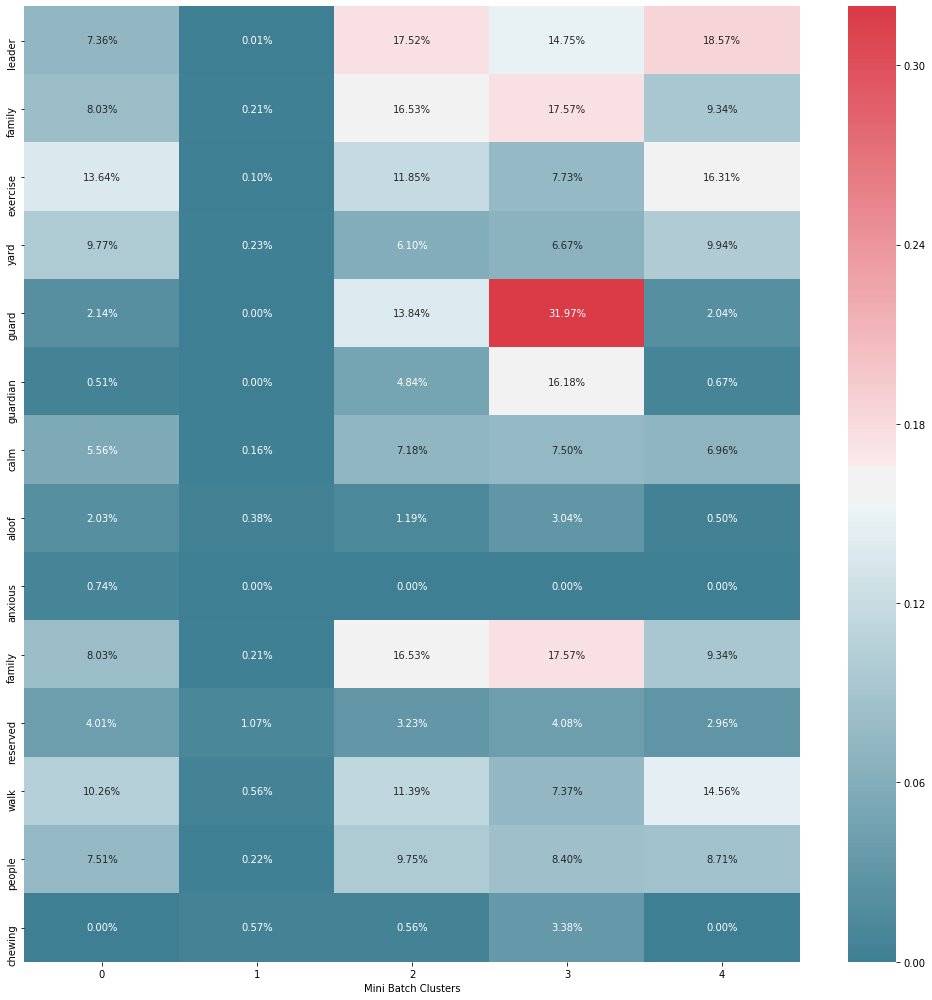

In [44]:
mini_heat_color = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(mini_single_heatmap, annot = True, cmap = mini_heat_color, fmt='.2%')
plt.savefig("single_feature_minibatch_heatmap.png")
plt.tight_layout()

### Mean Shift

Mean Shift is a good clustering method to use if you don't know how many clusters you are looking for. It's also a good method to use if there is a suspicion that my clusters are heterogenous in size or shape. It's typically good for a small data set.  Since we did whittle the data set down based on our clean up activities at the beginning of the notebook, it will be interesting to see what results we get.

In [46]:
bandwidth = estimate_bandwidth(dog_pca, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(dog_pca)

predict_ms = ms.predict(dog_pca)

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(predict_ms))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


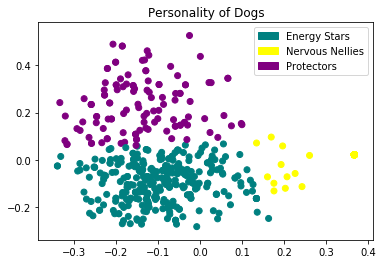

In [51]:
colormap1 = np.array(['teal', 'yellow','purple'])
plt.scatter(dog_pca[:, 0], dog_pca[:, 1],c=colormap1[predict_ms])

pop_a2 = mpatches.Patch(color='teal', label='Energy Stars')
pop_b2 = mpatches.Patch(color='yellow', label='Nervous Nellies')
pop_c2 = mpatches.Patch(color='purple', label='Protectors')

plt.legend(handles=[pop_a2,pop_b2,pop_c2])

plt.title('Personality of Dogs')
plt.savefig("single_feature_meanshift.png")
plt.show()

In [47]:
ms_single_features = pd.DataFrame(dogs_draft,columns=vectorizer.get_feature_names())
ms_single_features['Mean Shift Clusters'] = predict_ms

In [48]:
ms_single_features.groupby('Mean Shift Clusters').mean().transpose().sort_values(2,ascending=False)

Mean Shift Clusters,0,1,2
guard,0.021786,0.000000,0.226495
humans,0.085411,0.002128,0.194690
leader,0.135237,0.000117,0.163897
family,0.094229,0.005582,0.158320
guardian,0.006986,0.000000,0.098576
exercise,0.151102,0.004166,0.096899
walk,0.127636,0.005398,0.092748
people,0.083177,0.003252,0.090207
loyal,0.044703,0.000171,0.078458
calm,0.064268,0.001532,0.072465


In [49]:
ms_single_heatmap = ms_single_features.groupby('Mean Shift Clusters').mean().transpose().loc[['leader','family','exercise','yard','guard','guardian','calm','aloof','anxious','family','reserved','walk','people','chewing']]
ms_single_heatmap

Mean Shift Clusters,0,1,2
leader,0.135237,0.000117,0.163897
family,0.094229,0.005582,0.158320
exercise,0.151102,0.004166,0.096899
yard,0.096030,0.006095,0.065071
guard,0.021786,0.000000,0.226495
guardian,0.006986,0.000000,0.098576
calm,0.064268,0.001532,0.072465
aloof,0.012430,0.003721,0.019836
anxious,0.003422,0.000000,0.000000
family,0.094229,0.005582,0.158320


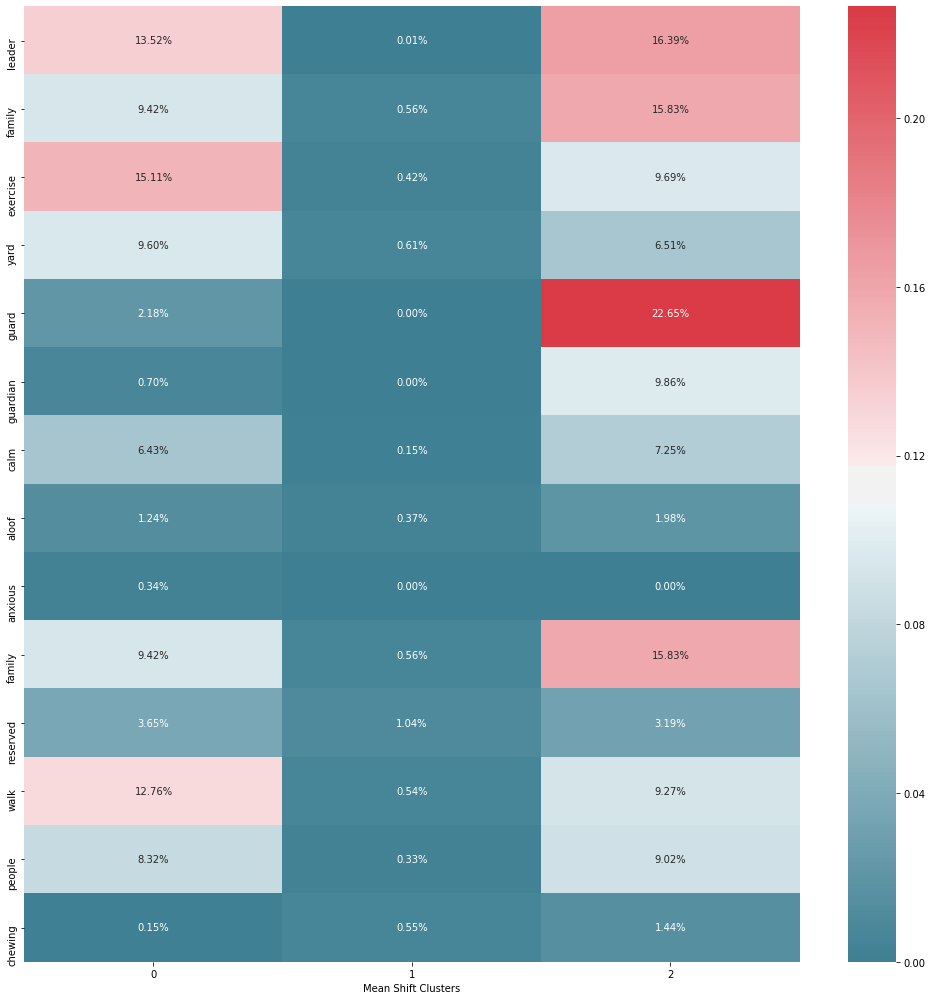

In [50]:
ms_heat_color = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(ms_single_heatmap, annot = True, cmap = mini_heat_color, fmt='.2%')
plt.savefig("single_feature_meanshift_heatmap.png")
plt.tight_layout()

How did I come to the conclusion to just use 5 clusters?  Based on the silhouette score below for K Means, even if I increase the number of clusters, the numbers start to stay in the same range.  I did not want to compromise the integrity of my clustering and when you start to have a lot of clusters, things get lost in all the noise.

In [52]:
for i in range(2,20):
    dog_pred = KMeans(n_clusters=i, random_state=45).fit_predict(dog_pca)
    print(metrics.silhouette_score(dog_pca, dog_pred, metric='euclidean'))

0.5823779237483357
0.5921645053542409
0.49072727034828784
0.49107296890408725
0.4970447139125126
0.4977830306641387
0.4948020424457542
0.48231240790324487
0.4790700039201822
0.474847813063652
0.479659856927632
0.49007597586988844
0.48407362017297806
0.48643957588413095
0.49301041189101424
0.49720023826720505
0.49359273694713224
0.49345488957682093


In [53]:
tsne = TSNE(n_components=2)
single_tsne = tsne.fit_transform(np.array(dog_pca))
single_tsne.shape

(572, 2)

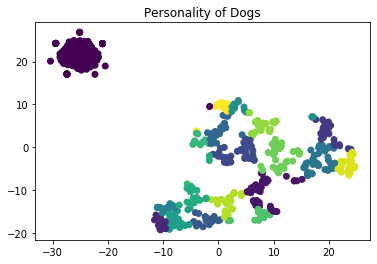

In [54]:
plt.scatter(single_tsne[:, 0], single_tsne[:, 1], c=dog_pred)
plt.title('Personality of Dogs')
plt.savefig("single_feature_tsne.png")
plt.show()

### t-SNE

The t-Distributed Stochastic Neighbor Embedding (t_SNE) is a technique of unsupervised learning that is primarily used for data exploration and visualizing high-dimensional data.  It gives you a feel of how the data is arranged ina  high-dimensional space.  Keep in mind that it is not a clustering algorithm, it is a dimensionality reduction algorithm.

What's the first thing you noticed about the scatter plot above?  Did that big purple blob on the left hand side say hello?  Keep in mind that this is not a clustering method.  It is helping us visualize the data in a better way and trying to solve for the crowding effect in the previous graphs. 

TSNE is interesting as it does not construct explicit mappings related to high dimensional and low dimensional spaces. TSNE captures structure of data in the sense that neighboring points in input spaces will tend to be neighbors in the low dimensional paces.

The TSNE models above are showing groupings in the datasets that we did not see with the original clustering views. In the examples above, the TSNE model by author is showing information that there is distinctive authors. We see vivid clusters of blues indicating distinctive authors. For clustering to be successful, we don't actually want to see them all in a same cluster - we want to be able to see separations. This is indicative that there is differences in the data.

We have seen what the clusters look like when we use a single word feature set.  Just to satisfy our curiousity, let's go through our models, but this time we will look at bigrams.

### Bigrams

In [55]:
vectorizer1 = CountVectorizer(stop_words = master_stop_list, min_df=0.005,max_df=0.25,max_features=200,ngram_range=(2, 2))
dogcount = vectorizer1.fit_transform(corpus)
print(vectorizer1.get_feature_names())

['aggressive humans', 'aggressive people', 'agility obedience', 'alert loyal', 'allergies exercised', 'animals animals', 'anxiety snapping', 'attention shedder', 'bark bark', 'biting humans', 'calm confident', 'calm exercise', 'calm intelligent', 'calm leader', 'calm submissive', 'confident leader', 'destructive alone', 'destructive exercise', 'devoted family', 'difficult housebreak', 'energetic exercise', 'energetic intelligent', 'energetic stamina', 'exercise calm', 'exercise destructive', 'exercise energetic', 'exercise exercise', 'exercise exercised', 'exercise family', 'exercise humans', 'exercise indoor', 'exercise leader', 'exercise outdoors', 'exercise person', 'exercise physical', 'exercise run', 'exercise sensitive', 'exercise shedder', 'exercise walks', 'exercise yard', 'exercised inactive', 'exercised restless', 'exercised walk', 'exercised yard', 'family calm', 'family cats', 'family companions', 'family confident', 'family exercise', 'family family', 'family friends', 'fa

In [56]:
print(dogcount.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
dogs_bigram = dogcount.todense()

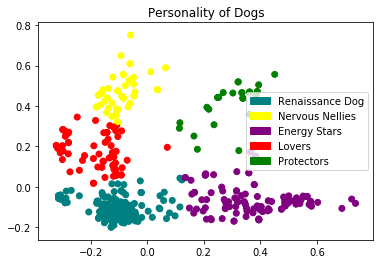

In [65]:
bigram_model = normalize(dogs_bigram)

bigram_pca = PCA(2).fit_transform(bigram_model)

bigram_pred = KMeans(n_clusters=5, random_state=42).fit_predict(bigram_pca)

bigram_color = np.array(['teal', 'yellow','purple','red','green'])
plt.scatter(bigram_pca[:, 0], bigram_pca[:, 1], c=bigram_color[bigram_pred])

bigram_a = mpatches.Patch(color='teal', label='Renaissance Dog')
bigram_b = mpatches.Patch(color='yellow', label='Nervous Nellies')
bigram_c = mpatches.Patch(color='purple', label='Energy Stars')
bigram_d = mpatches.Patch(color='red', label='Lovers')
bigram_e = mpatches.Patch(color='green', label='Protectors')

plt.legend(handles=[bigram_a,bigram_b,bigram_c,bigram_d,bigram_e])

plt.title('Personality of Dogs')
plt.savefig("bigram_feature_kmeans.png")
plt.show()

The clusters are more distinctly scattered when we use the bigram keyword corpus.  We do have a couple of outliers, but that is to be expected when working with a data set with as many features as this one has.

In [59]:
bigram_features = pd.DataFrame(dogs_bigram,columns=vectorizer1.get_feature_names())
bigram_features['K Means Clusters'] = bigram_pred

In [60]:
bigram_features['Dog_Name']=dogs_update['Dog_Name']

In [61]:
bigram_features.groupby('K Means Clusters').mean()

,aggressive humans,aggressive people,agility obedience,alert loyal,allergies exercised,animals animals,anxiety snapping,attention shedder,bark bark,biting humans,...,watchdog obedience,yard energetic,yard exercise,yard exercised,yard outdoors,yard run,yard sensitive,yard shedder,yard walk,yard walks
K Means Clusters,,,,,,,,,,,,,,,,,,,,,
0,0.018237,0.024316,0.085106,0.033435,0.009119,0.006079,0.018237,0.030395,0.030395,0.000000,...,0.015198,0.021277,0.109422,0.015198,0.042553,0.030395,0.039514,0.027356,0.075988,0.027356
1,0.041667,0.041667,0.020833,0.020833,0.062500,0.000000,0.000000,0.020833,0.000000,0.541667,...,0.062500,0.000000,0.312500,0.000000,0.083333,0.062500,0.000000,0.000000,0.125000,0.041667
2,0.019417,0.009709,0.077670,0.009709,0.048544,0.067961,0.000000,0.038835,0.009709,0.009709,...,0.058252,0.058252,0.097087,0.009709,0.077670,0.019417,0.038835,0.000000,0.155340,0.009709
3,0.015152,0.000000,0.196970,0.015152,0.030303,0.015152,0.075758,0.030303,0.030303,0.030303,...,0.060606,0.030303,0.090909,0.060606,0.060606,0.136364,0.060606,0.060606,0.363636,0.121212
4,0.038462,0.115385,0.000000,0.000000,0.038462,0.038462,0.038462,0.038462,0.038462,0.692308,...,0.038462,0.000000,0.153846,0.000000,0.153846,0.038462,0.000000,0.038462,0.115385,0.000000


In [62]:
bigram_features.groupby('K Means Clusters').mean().transpose().sort_values(0,ascending=False)

K Means Clusters,0,1,2,3,4
physical exercise,0.179331,0.145833,0.252427,0.303030,0.153846
confident leader,0.170213,0.187500,0.145631,0.287879,0.038462
fenced yard,0.130699,0.145833,0.145631,0.500000,0.153846
yard exercise,0.109422,0.312500,0.097087,0.090909,0.153846
calm confident,0.100304,0.166667,0.310680,0.106061,0.076923
inactive yard,0.094225,0.291667,0.135922,0.151515,0.192308
exercised yard,0.091185,0.166667,0.145631,0.181818,0.076923
agility obedience,0.085106,0.020833,0.077670,0.196970,0.000000
exercise walks,0.085106,0.208333,0.106796,0.075758,0.115385
walk exercise,0.082067,0.062500,0.000000,0.333333,0.000000


In [63]:
bigram_heatmap = bigram_features.groupby('K Means Clusters').mean().transpose().loc[['physical exercise','confident leader','calm confident','leader humans','biting humans','people family','person lead','walk person', 'fenced yard','separation anxiety','agility obedience','protective family','loyal protective' ]]
bigram_heatmap

K Means Clusters,0,1,2,3,4
physical exercise,0.179331,0.145833,0.252427,0.303030,0.153846
confident leader,0.170213,0.187500,0.145631,0.287879,0.038462
calm confident,0.100304,0.166667,0.310680,0.106061,0.076923
leader humans,0.003040,1.604167,0.077670,0.984848,1.153846
biting humans,0.000000,0.541667,0.009709,0.030303,0.692308
people family,0.018237,0.250000,0.048544,0.060606,0.076923
person lead,0.018237,0.020833,0.970874,0.015152,1.000000
walk person,0.012158,0.000000,0.951456,0.015152,1.000000
fenced yard,0.130699,0.145833,0.145631,0.500000,0.153846
separation anxiety,0.051672,0.000000,0.038835,0.287879,0.076923


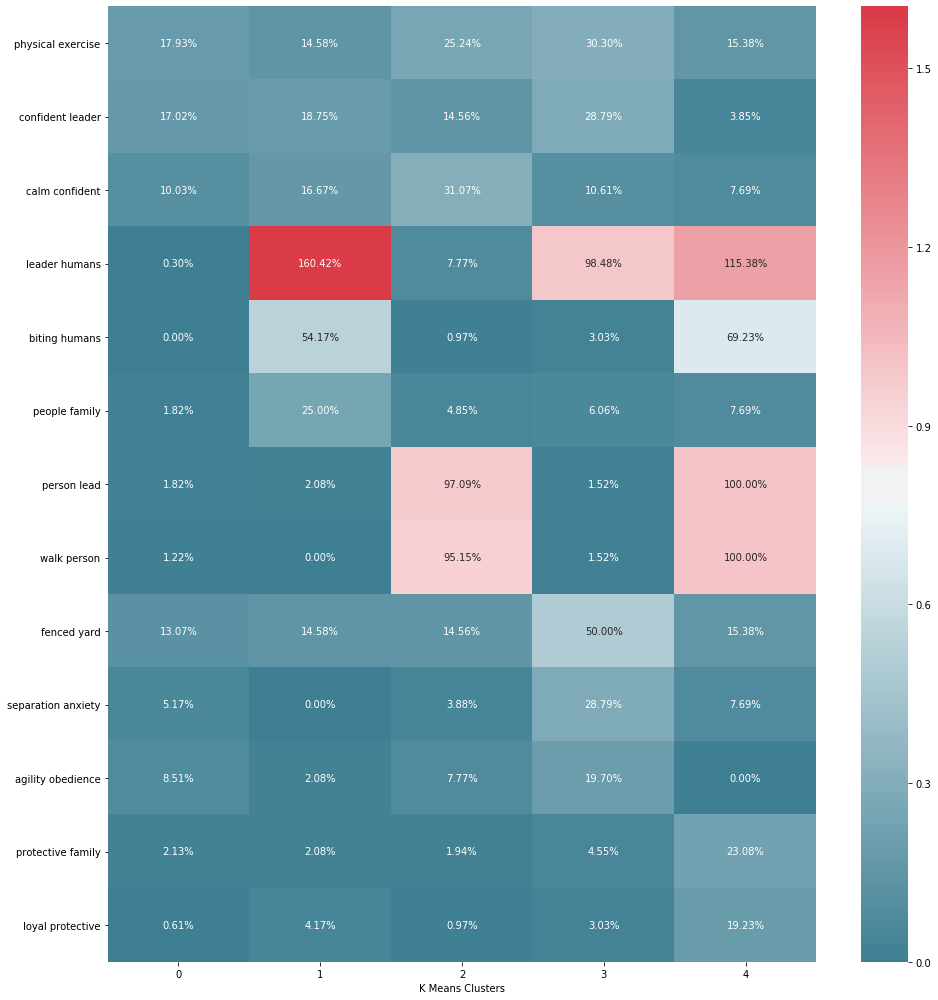

In [64]:
bigram_heat = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(bigram_heatmap, annot = True, cmap = bigram_heat, fmt='.2%')
plt.savefig("bigram_feature_kmeans_heatmap.png")
plt.tight_layout()

Off the bat, the heatmap shows a better distribution of the selected keywords against the clusters.  The features themselves are also more consistent among multiple dog breeds and help to paint a more complete picture than just the single keyword feature.

For example look at cluster 3.  Separation Anxiety is ranked highest in this cluster, but also ranks high with Leader Humans. This would be the "Nervous Nellies" grouping.  While they are loving, they need an owner that will establish themselves as an alpha and be confident in their interaction with breeds in this cluster.  They also rank the highest in separation anxiety, which is again an attribute found in the "Nervous Nellies" grouping.

In [66]:
minibatchkmeans1 = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=289)
minibatchkmeans1.fit(bigram_pca)

bigram_mini = minibatchkmeans1.predict(bigram_pca)

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(bigram_mini, bigram_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0   1    2   3   4
row_0                      
0       43   0    2  32   0
1        0   0  100   0   0
2      286   0    1   0   0
3        0   1    0   0  26
4        0  47    0  34   0


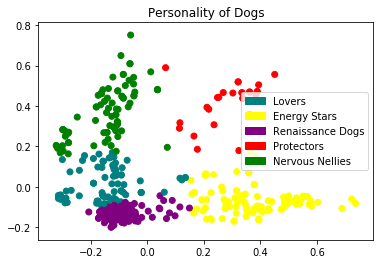

In [73]:
bigram_color = np.array(['teal', 'yellow','purple','red','green'])
plt.scatter(bigram_pca[:, 0], bigram_pca[:, 1], c=bigram_color[bigram_mini])

bigram_a1 = mpatches.Patch(color='teal', label='Lovers')
bigram_b1 = mpatches.Patch(color='yellow', label='Energy Stars')
bigram_c1 = mpatches.Patch(color='purple', label='Renaissance Dogs')
bigram_d1 = mpatches.Patch(color='red', label='Protectors')
bigram_e1 = mpatches.Patch(color='green', label='Nervous Nellies')

plt.legend(handles=[bigram_a1,bigram_b1,bigram_c1,bigram_d1,bigram_e1])

plt.title('Personality of Dogs')
plt.savefig("bigram_feature_minibatch.png")
plt.show()

Again the clusters are pretty defined, but there is more scatter in 1 of the clusters.  We also see a lot of 0's in the chart above, which is also indicative that solid grouping is happening.

In [67]:
mini_bigram_features = pd.DataFrame(dogs_bigram,columns=vectorizer1.get_feature_names())
mini_bigram_features['Mini Batch Clusters'] = bigram_mini

In [68]:
mini_bigram_features.groupby('Mini Batch Clusters').mean().transpose().sort_values(4,ascending=False)

Mini Batch Clusters,0,1,2,3,4
leader humans,0.311688,0.08,0.000000,1.148148,1.456790
humans leader,0.207792,0.05,0.000000,0.925926,0.814815
humans humans,0.142857,0.06,0.000000,0.740741,0.481481
fenced yard,0.389610,0.14,0.083624,0.148148,0.370370
biting humans,0.000000,0.01,0.000000,0.703704,0.333333
human leader,0.259740,0.06,0.017422,0.185185,0.333333
leader biting,0.000000,0.00,0.000000,0.703704,0.308642
yard walk,0.324675,0.13,0.041812,0.111111,0.259259
walk exercise,0.220779,0.00,0.052265,0.000000,0.246914
inactive yard,0.233766,0.14,0.062718,0.185185,0.234568


In [69]:
mini_bigram_features['Dog_Name']=dogs_update['Dog_Name']

In [70]:
mini_bigram_features.groupby('Mini Batch Clusters').mean().transpose().sort_values(0,ascending=False)

Mini Batch Clusters,0,1,2,3,4
confident leader,0.415584,0.13,0.139373,0.037037,0.172840
fenced yard,0.389610,0.14,0.083624,0.148148,0.370370
yard walk,0.324675,0.13,0.041812,0.111111,0.259259
leader humans,0.311688,0.08,0.000000,1.148148,1.456790
human leader,0.259740,0.06,0.017422,0.185185,0.333333
human humans,0.259740,0.14,0.038328,0.037037,0.024691
physical exercise,0.246753,0.25,0.188153,0.148148,0.172840
inactive yard,0.233766,0.14,0.062718,0.185185,0.234568
walk walks,0.233766,0.04,0.034843,0.074074,0.222222
walk exercise,0.220779,0.00,0.052265,0.000000,0.246914


In [71]:
mini_bigram_heatmap = mini_bigram_features.groupby('Mini Batch Clusters').mean().transpose().loc[['physical exercise','confident leader','calm confident','leader humans','biting humans','people family','person lead','walk person', 'fenced yard','separation anxiety','agility obedience','protective family','loyal protective' ]]
mini_bigram_heatmap

Mini Batch Clusters,0,1,2,3,4
physical exercise,0.246753,0.25,0.188153,0.148148,0.172840
confident leader,0.415584,0.13,0.139373,0.037037,0.172840
calm confident,0.090909,0.31,0.111498,0.074074,0.123457
leader humans,0.311688,0.08,0.000000,1.148148,1.456790
biting humans,0.000000,0.01,0.000000,0.703704,0.333333
people family,0.038961,0.05,0.017422,0.074074,0.172840
person lead,0.012987,0.99,0.020906,0.962963,0.024691
walk person,0.000000,0.97,0.017422,0.962963,0.012346
fenced yard,0.389610,0.14,0.083624,0.148148,0.370370
separation anxiety,0.194805,0.04,0.038328,0.074074,0.123457


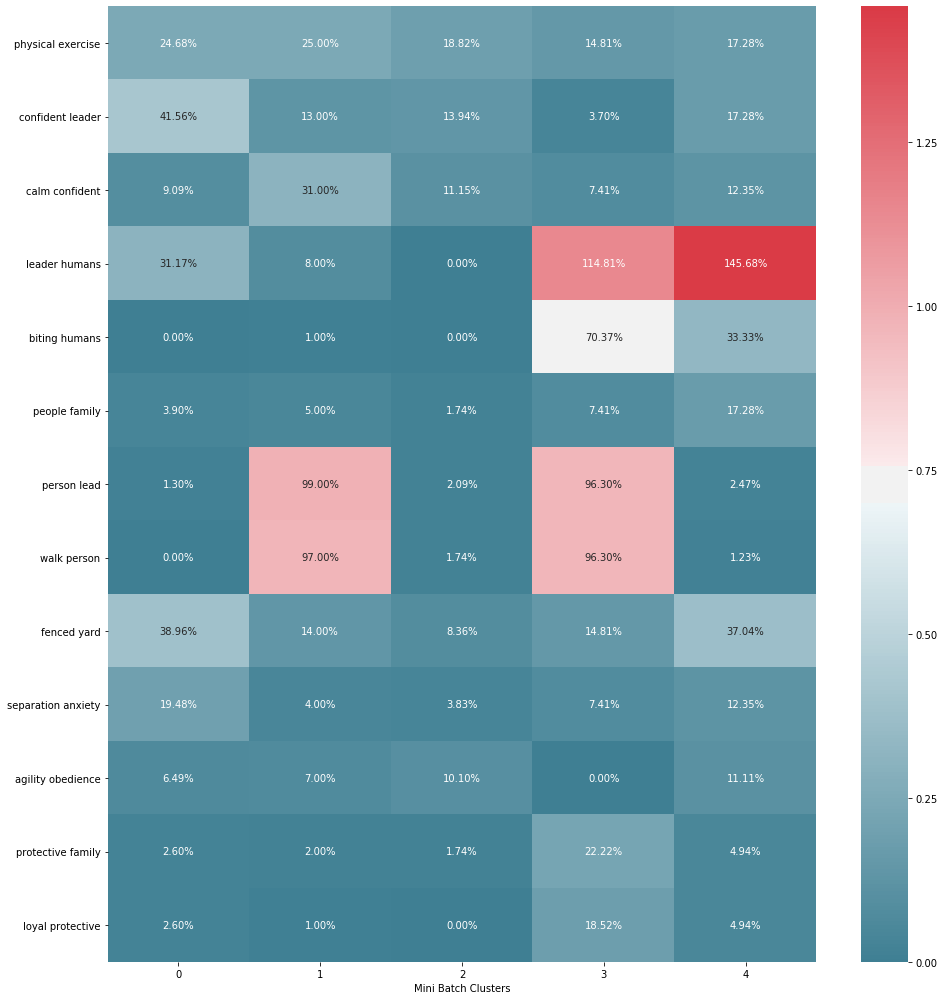

In [72]:
mini_bigram_heat = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(mini_bigram_heatmap, annot = True, cmap = bigram_heat, fmt='.2%')
plt.savefig("bigram_feature_minibatch_heatmap.png")
plt.tight_layout()

In [74]:
bandwidth1 = estimate_bandwidth(bigram_pca, quantile=0.2)

ms1 = MeanShift(bandwidth=bandwidth1, bin_seeding=True)
ms1.fit(bigram_pca)

bigram_ms = ms1.predict(bigram_pca)

cluster_centers1 = ms1.cluster_centers_

n_clusters_1 = len(np.unique(bigram_ms))

print("Number of estimated clusters: {}".format(n_clusters_1))

Number of estimated clusters: 5


col_0    0   1   2   3   4
row_0                     
0        0  26   0   0   0
1       46   0   0   0   0
2        0   0   0  16   0
3        0   0   0   0  18
4        1  16   0   0   0
5        0   0  28   0   0
6       12   0   0   0   0
7        0   0   9  11   0
8        0   0  19   0   0
9        0   6   0   0   1
10       0   0   0  10   0
11       4  12   0   0   0
12      22   0   0   0   0
13       0  37   0   0   0
14       0   0   1   2   5
15     235   0   0   0   0
16       0   0   0  17   0
17      14   0   1   0   0
18       0   3   0   0   0


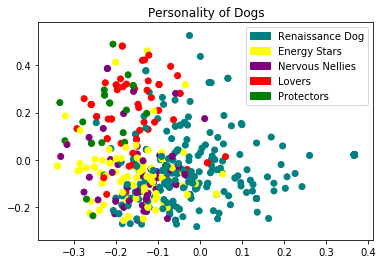

In [84]:
bigram_color = np.array(['teal', 'yellow','purple','red','green'])
plt.scatter(dog_pca[:, 0], dog_pca[:, 1],c=bigram_color[bigram_ms])

bigram_a3 = mpatches.Patch(color='teal', label='Renaissance Dog')
bigram_b3 = mpatches.Patch(color='yellow', label='Energy Stars')
bigram_c3 = mpatches.Patch(color='purple', label='Nervous Nellies')
bigram_d3 = mpatches.Patch(color='red', label='Lovers')
bigram_e3 = mpatches.Patch(color='green', label='Protectors')

plt.legend(handles=[bigram_a3,bigram_b3,bigram_c3,bigram_d3,bigram_e3])

print(pd.crosstab(bigram_pred,bigram_ms))

plt.title('Personality of Dogs')
plt.savefig("bigram_feature_meanshift.png")
plt.show()

In an interesting turn of events, using Mean Shift for the bigrams analysis is not as strong as what we saw in the single keyword analysis.  Our Mean Shift for bigrams turned up 2 more estimated clusters than the single keywords.  There is no distinct grouping as what we saw earlier and there is more scattered representation.

In [75]:
ms_bigram_features = pd.DataFrame(dogs_bigram,columns=vectorizer1.get_feature_names())
ms_bigram_features['Mean Shift Clusters'] = bigram_ms

In [76]:
ms_bigram_features.groupby('Mean Shift Clusters').mean().transpose().sort_values(2,ascending=False)

Mean Shift Clusters,0,1,2,3,4
leader humans,0.008982,0.08,0.948276,1.571429,1.125000
fenced yard,0.131737,0.14,0.551724,0.160714,0.125000
human leader,0.047904,0.06,0.517241,0.125000,0.166667
walk walks,0.068862,0.04,0.379310,0.035714,0.041667
yard walk,0.083832,0.13,0.362069,0.178571,0.083333
walk exercise,0.080838,0.00,0.362069,0.071429,0.000000
lead fenced,0.038922,0.07,0.362069,0.035714,0.041667
humans leader,0.014970,0.05,0.362069,1.053571,0.916667
safe lead,0.038922,0.04,0.344828,0.035714,0.041667
walks safe,0.035928,0.04,0.310345,0.053571,0.041667


In [77]:
ms_bigram_features['Dog_Name']=dogs_update['Dog_Name']

In [78]:
ms_bigram_heatmap = ms_bigram_features.groupby('Mean Shift Clusters').mean().transpose().loc[['physical exercise','confident leader','calm confident','leader humans','biting humans','people family','person lead','walk person', 'fenced yard','separation anxiety','agility obedience','protective family','loyal protective' ]]
ms_bigram_heatmap

Mean Shift Clusters,0,1,2,3,4
physical exercise,0.185629,0.25,0.293103,0.142857,0.166667
confident leader,0.185629,0.13,0.258621,0.178571,0.000000
calm confident,0.101796,0.31,0.120690,0.142857,0.083333
leader humans,0.008982,0.08,0.948276,1.571429,1.125000
biting humans,0.000000,0.01,0.017241,0.482143,0.750000
people family,0.017964,0.05,0.068966,0.214286,0.083333
person lead,0.020958,0.99,0.017241,0.053571,1.000000
walk person,0.014970,0.97,0.017241,0.035714,1.000000
fenced yard,0.131737,0.14,0.551724,0.160714,0.125000
separation anxiety,0.056886,0.04,0.258621,0.053571,0.041667


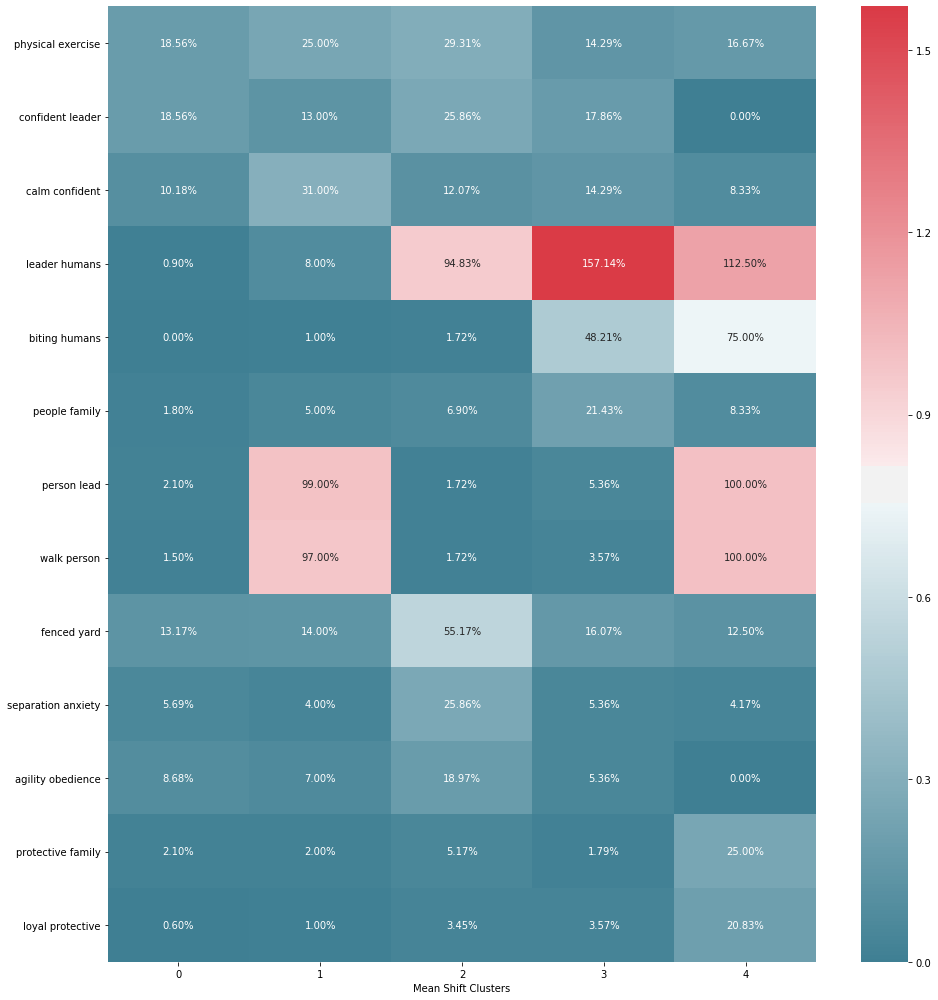

In [79]:
ms_bigram_heat = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(ms_bigram_heatmap, annot = True, cmap = bigram_heat, fmt='.2%')
plt.savefig("bigram_feature_meanshift_heatmap.png")
plt.tight_layout()

In [81]:
tsne1 = TSNE(n_components=2)
bigram_tsne= tsne1.fit_transform(np.array(bigram_pca))
bigram_tsne.shape

(572, 2)

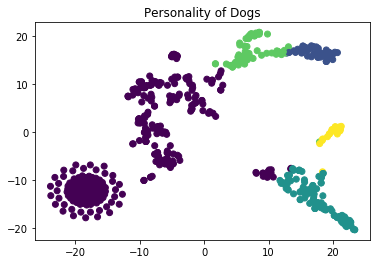

In [82]:
plt.scatter(bigram_tsne[:, 0], bigram_tsne[:, 1], c=bigram_pred)
plt.title('Personality of Dogs')
plt.savefig("bigram_feature_tsne.png")
plt.show()

t-SNE for the bigrams features visually show us the separation of the different items.  It is interesting that both the single and bigram feature sets both have a circle of outliers.  The large groupings could be indicative of features that may be a little duplicative. 

In [83]:
for i in range(2,20):
    bigram_pred = KMeans(n_clusters=i, random_state=42).fit_predict(bigram_pca)
    print(metrics.silhouette_score(dogcount, bigram_pred, metric='euclidean'))

0.1398477369246603
0.14344305463955728
0.1479414648078679
0.15071253250136551
0.09307670172974485
0.09790936852385156
0.07989464191460995
0.08175195123311509
0.07878773376060923
0.09229446401633053
0.09403445313019161
0.08333513870977319
0.09803051087017237
0.09588791343295643
0.09650491321947867
0.06534149607357309
0.10053755917168257
0.03194251064070501


### Use Case

Thank you for spending your time in walking through my workbook and the different processes.  Now, time for the million dollar question:  How would an end user utilize the information provided in my project in application?  As I mentioned at the beginning, it is my intent to allow the end user the ability to find dogs that are best suited for their environment and lifestyle.  By doing this, it would also serve to educate the user on dog breeds.  A lot of times people get dogs that they think sound awesome, only to not be able to care for them or give them the environment that the dog needs.  For example, when “Game of Thrones” first started, people fell in love with the Direwolves and started to get Huskies.  However, Huskies are very vocal and require a lot of exercise.  A lot of people did not realize this and unfortunately, a lot of the huskies ended up in shelters or given back to breeders.

With my product, the end user would be able to type in keywords to describe features such as:
* Suited for apartment living
* Protective
* Good with other animals
* Social
* Skittish

Based on what the user typed in, the words would then be searched against the dataframe and turn up dogs that best suit their desired attributes.  If you live an apartment and type in the the features of quiet, apartment, walks, and no yard required, then the product would provide dogs that would fit this criteria.  Some examples would be:  Chihuahua, Poodle, Maltese, etc.  It would not turn up dogs such as Huskies and Beagles who are both known to be very vocal and active dogs that do best in a yard.

### Lessons Learned

* Web scraping, when used properly, is a very helpful process to work through large sets of data and transform it into a dataframe that allows for further analysis.  However, when web scraping, it is important to not do it multiple times or you run the risk of being banned from a website.

* Reduce features - should not have more features than rows.

* Eliminate redundant features.  If you have a lot of redundant features, then the point of the product is lost.  If you are trying to distinguish between skittish dogs and more confident dogs, they could get grouped into the same cluster because of redundant feautures.

### Summary

Natural Language Processing (NLP) is very useful skill to understand.  It is the technology that is used to aid a computer in understanding human's natural language.  Applications that use NLP include Siri, Microsoft Word Grammarly (which checks the grammatical accuracy of the text).  By using NLP, I was able to work with a large amount of data from the dogbreedinfo.com website and use different techniques to first clean the data, and then extract words and work through various clustering and visualization methods.

My data started with a lot of information.  We had at least 1000+ dog breeds even after we went through the web scraping and initial clean. By utilizing different methods to strip out text that was below a certain threshold of character counts and dropping rows that were not needed, we were able to reduce our dataframe to 952 dog breeds.  Creating stop lists to remove unneccesary words allowed us to reduce the amount of features we had.  Add in the Count and Tfidf Vectorizers that were used, and we were able to get data that provided valuable insights when run through the different clusting methods.  Remember, when you have a large data set it does tend to make clustering attempts difficult as there are too many data points to try to group together.  This can result in clusters of data with no correlation.

Based on the different clustering methods, visualizations, and evaluations run, I have determined that the K Means clustering on the single keyword features provides the most useful information.  The dog personalities are distinctly grouped and there is specific clustering happening.  We do have a cluster that is showing very low numbers, but that could more indicative of the features chosen as opposed to the functionality of the cluster.  The single keyword features also posted higher silhouette scores.  The closer to 1 you can get with the silhouette score, the better.The dog breeds are also corresponding better with the bigram features.  In the single keyword K Means, you see a cluster that is showing very very low numbers (if not 0) in the features that were selected.  In the bigrams features, the keywords chosen are dispersed a little better and helps aid the analysis.

### Conclusion

I really enjoyed this project.  Being able to use my chosen specialization of NLP really made this project and goal interesting.  I walked into the project having a high level idea of what I wanted to accomplish, but actually being able to work through it and see materialize is amazing.  I thought that it would be easy to tell what dogs would naturally fall into a cluster category because of what I knew form the breeds.  However, this project proved that I would be able to learn by having an application like this.  I would naturally think that Alaskan Huskies would be amazing with people and super social; however, in working through this, I learned that they are also very aloof and can have big separation anxiety.  

I have also learned through this process that it is important to understand This project was very interesting.  I walked into the project thinking that since I had a lot of data to choose from, my models would be amazing.  However, what I found to be successful was just the opposite. What did I learn through this process?

I sense a theme that too much data can be a bad thing.  It is also very important to understand the correct data cleaning techniques that are applicable to your dataset and situation.  It is easy to get lost in the details and visualizatins are nice, but they don't mean anything more than pretty colors if you can't tell what they are trying to show.

From my Final Capstone project, I have learned the following:

* Know what you want to solve for and understand the correct techniques needed to present your analysis
* Reduce data size where applicable - we want to make sure that our data sample set is manageable, but provides enough diversity so that we can see interesting patterns
* When clustering, playing with different parameters can show interesting patterns in the data
* Utilize evaluation techniques to determine an appropriate number of clusters you need to build into your code
* Reduce features - take care to reduce duplication where possible

The possibilities are endless and this project serves as a framework for other areas where the functionality presented could be applied.  Could we take this same idea and apply it to an application that would recommend places for a person to live?  I think so.